# **Phase 3:**

# Read Dataset:

In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier        # for KNN
from sklearn.linear_model import LogisticRegression       # for Logistic Regression
from sklearn.svm import SVC                               # for SVM

from sklearn.metrics import precision_score, recall_score, f1_score  # extra metrics

data = pd.read_csv("Dataset/Preprocessed_data.csv")
data.head()

,FastingBloodSugar,HbA1c,FrequentUrination,Hypertension,ExcessiveThirst,UnexplainedWeightLoss,DiastolicBP,Smoking,SystolicBP,FamilyHistoryDiabetes,Diagnosis
0,0.720868,0.881839,0,0,0,0,0.220339,1,0.033708,1,1
1,0.910763,0.555064,0,0,0,0,0.661017,0,0.842697,0,1
2,0.443775,0.013416,0,0,0,0,0.525424,0,0.325843,1,0
3,0.097133,0.419758,0,0,0,0,0.457627,1,0.887640,1,0
4,0.159161,0.267887,0,0,0,0,0.152542,0,0.842697,0,0


**Define Features and Target Variable** 

- **Features (X):** All independent variables used for prediction.  
- **Target (y):** The dependent variable we want to predict the Diagnosis column (0 = No Diabetes, 1 = Diabetes).


In [4]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Information Gain (Entropy):

* Splitting Data into 80% Training and 20% Test:

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Entropy – 80/20):

In [6]:
# Train model
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_80.predict(X_test)

# Evaluation
acc_entropy_80 = accuracy_score(y_test, y_pred)
cm_entropy_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 80/20 Split):

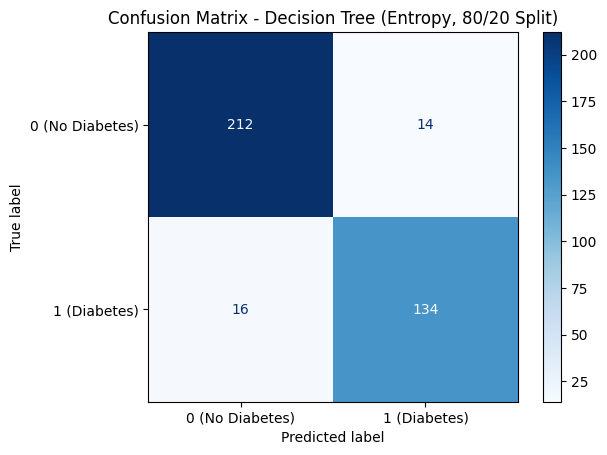

In [7]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 80/20 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 212)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 14)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 16)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 134)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 80/20 Split):

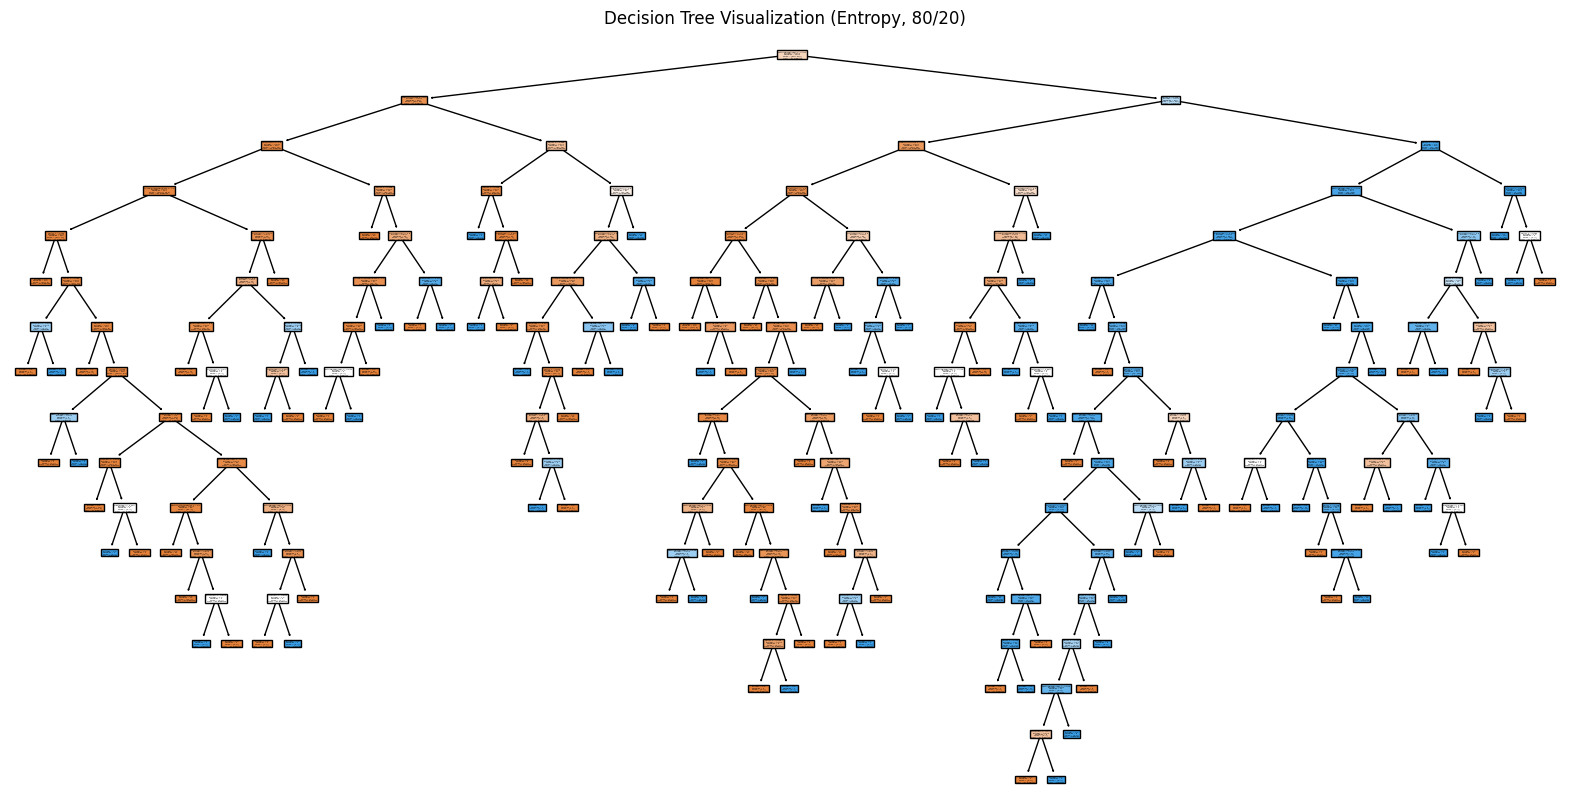

In [8]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy, 80/20)")
plt.show()

**Decision Tree Analysis (Entropy – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.



The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (92% accuracy overall), it may also be too deep, suggesting that the model could be slightly overfitted to the training data.  


* Model Evaluation Results (Entropy – 80/20 Split):

In [9]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_80)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_80, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_80 = 1 - acc_entropy_80
print("Error Rate:", round(error_rate_entropy_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_entropy_80 = cm_entropy_80[0, 0]
FP_entropy_80 = cm_entropy_80[0, 1]
FN_entropy_80 = cm_entropy_80[1, 0]
TP_entropy_80 = cm_entropy_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FN_entropy_80)
print("Sensitivity (Recall):", round(sensitivity_entropy_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_80 = TN_entropy_80 / (TN_entropy_80 + FP_entropy_80)
print("Specificity:", round(specificity_entropy_80, 4))

# Precision: positive predictive value
precision_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FP_entropy_80)
print("Precision:", round(precision_entropy_80, 4))

Confusion Matrix:
 [[212  14]
 [ 16 134]]

Accuracy: 0.9202
Error Rate: 0.0798
Sensitivity (Recall): 0.8933
Specificity: 0.9381
Precision: 0.9054


**Performance Metrics Analysis (Entropy – 80/20 Split):**
- **Accuracy:** 0.9202  
  The model correctly predicted approximately **92.02%** of the test samples.
- **Error Rate:** 0.0798  
  About **7.98%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9381  
  The model correctly identified **93.81%** of non-diabetic patients (class 0).
- **Precision:** 0.9054  
  Out of all patients predicted as diabetic, **90.54%** were truly diabetic.


**Results (Entropy – 80/20 Split):** 

The model demonstrates strong overall performance with high accuracy and balanced precision and recall.  
- It performs slightly better at detecting non-diabetic patients (specificity = 93.81%) than diabetic ones (sensitivity = 89.33%).  
- This indicates that while the classifier is generally reliable, a few diabetic cases are still being missed (false negatives).  
- Considering the medical context, minimizing false negatives is crucial.

---

* Splitting Data into 75% Training and 25% Test:

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Entropy – 75/25):

In [11]:
# Train
clf_entropy_75 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_75.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_75.predict(X_test)

# Evaluation
acc_entropy_75 = accuracy_score(y_test, y_pred)
cm_entropy_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 75/25 Split):

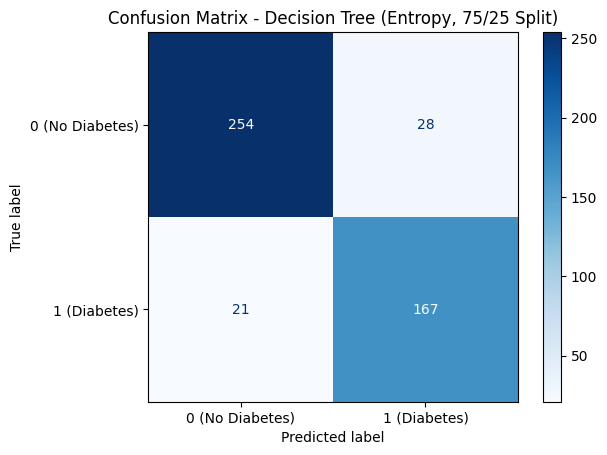

In [12]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 75/25 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 75/25 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 254)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 28)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 21)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 167)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 75/25 Split):

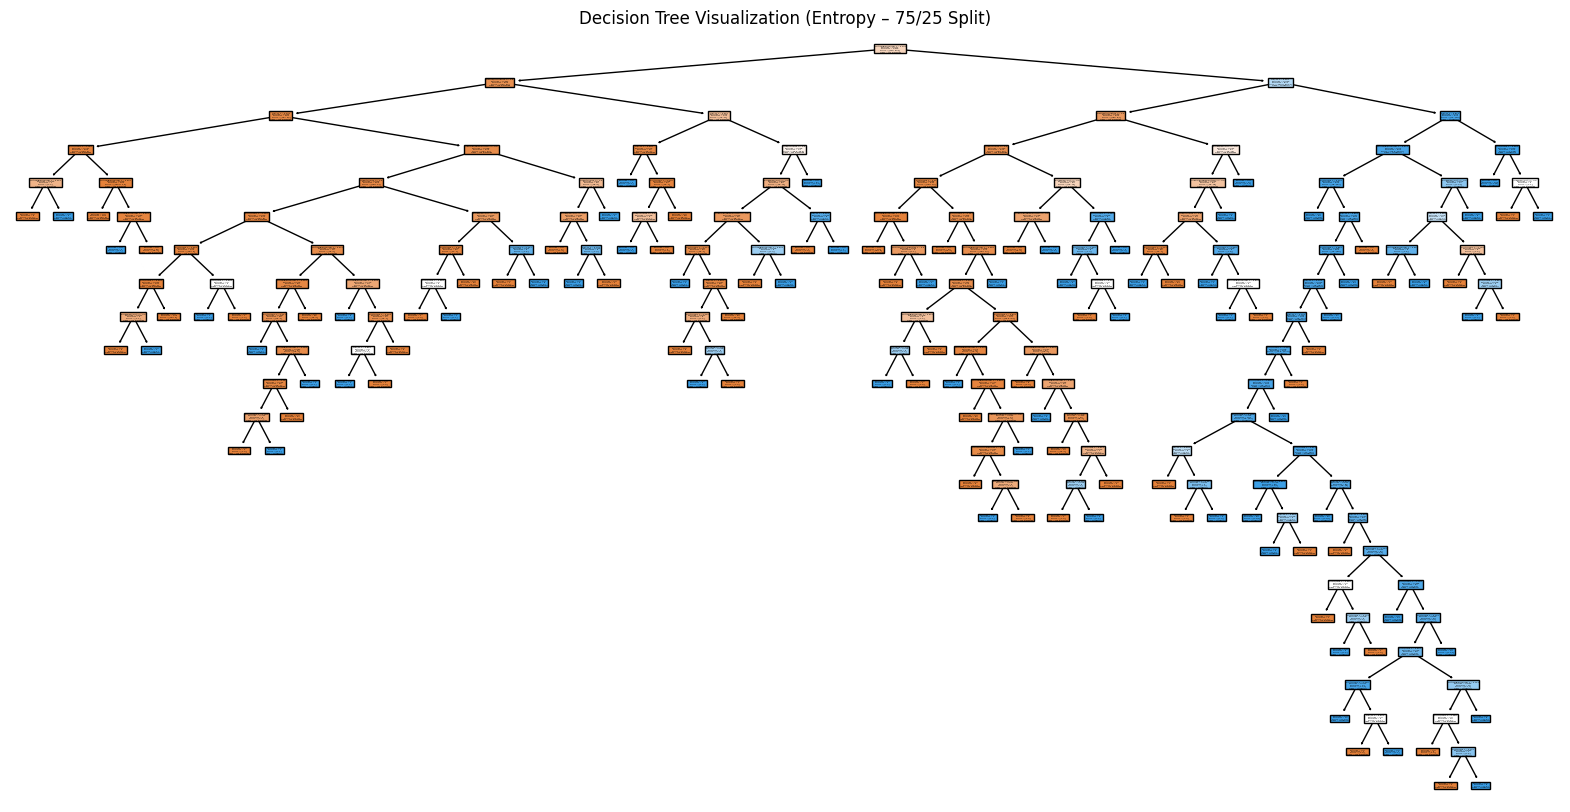

In [13]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 75/25 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 75/25 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (89.57% accuracy overall), it shows slightly less accuracy than 80/20 split.

* Model Evaluation Results (Entropy – 75/25 Split):

In [14]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_75)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_75, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_75 = 1 - acc_entropy_75
print("Error Rate:", round(error_rate_entropy_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_75 = cm_entropy_75[0, 0]
FP_75 = cm_entropy_75[0, 1]
FN_75 = cm_entropy_75[1, 0]
TP_75 = cm_entropy_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_75 = TP_75 / (TP_75 + FN_75)
print("Sensitivity (Recall):", round(sensitivity_entropy_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_75 = TN_75 / (TN_75 + FP_75)
print("Specificity:", round(specificity_entropy_75, 4))

# Precision: positive predictive value
precision_entropy_75 = TP_75 / (TP_75 + FP_75)
print("Precision:", round(precision_entropy_75, 4))

Confusion Matrix:
 [[254  28]
 [ 21 167]]

Accuracy: 0.8957
Error Rate: 0.1043
Sensitivity (Recall): 0.8883
Specificity: 0.9007
Precision: 0.8564


**Performance Metrics Analysis (Entropy – 75/25 Split):**
- **Accuracy:** 0.8957  
  The model correctly predicted approximately **89.57%** of the test samples.
- **Error Rate:** 0.1043  
  About **10.43%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8880  
  The model correctly identified **88.80%** of actual diabetic patients (class 1).
- **Specificity:** 0.9007  
  The model correctly identified **90.07%** of non-diabetic patients (class 0).
- **Precision:** 0.8564  
  Out of all patients predicted as diabetic, **85.64%** were truly diabetic.


**Results (Entropy – 75/25 Split):** 

The model shows strong and consistent performance even with a larger test set.  
- It maintains high accuracy (≈89.6%) and balanced precision and recall values.  
- The classifier performs slightly better at recognizing non-diabetic patients (specificity = 90.07%) compared to diabetic ones (sensitivity = 88.80%).  
- This means a small portion of diabetic cases were still misclassified as non-diabetic (false negatives).  
- In medical diagnosis, reducing false negatives is critical, as missing diabetic patients could delay treatment.  

---

* Splitting Data into 70% Training and 30% Test:

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Entropy – 70/30):

In [16]:
# Train
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_70.predict(X_test)

# Evaluation
acc_entropy_70 = accuracy_score(y_test, y_pred)
cm_entropy_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 70/30 Split):


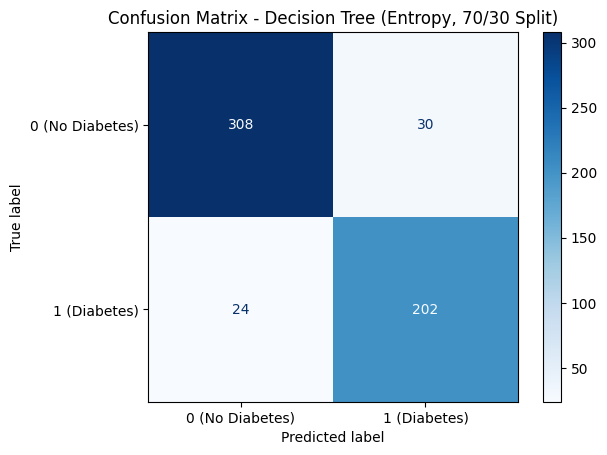

In [17]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 70/30 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 308)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 30)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 24)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 202)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 70/30 Split):


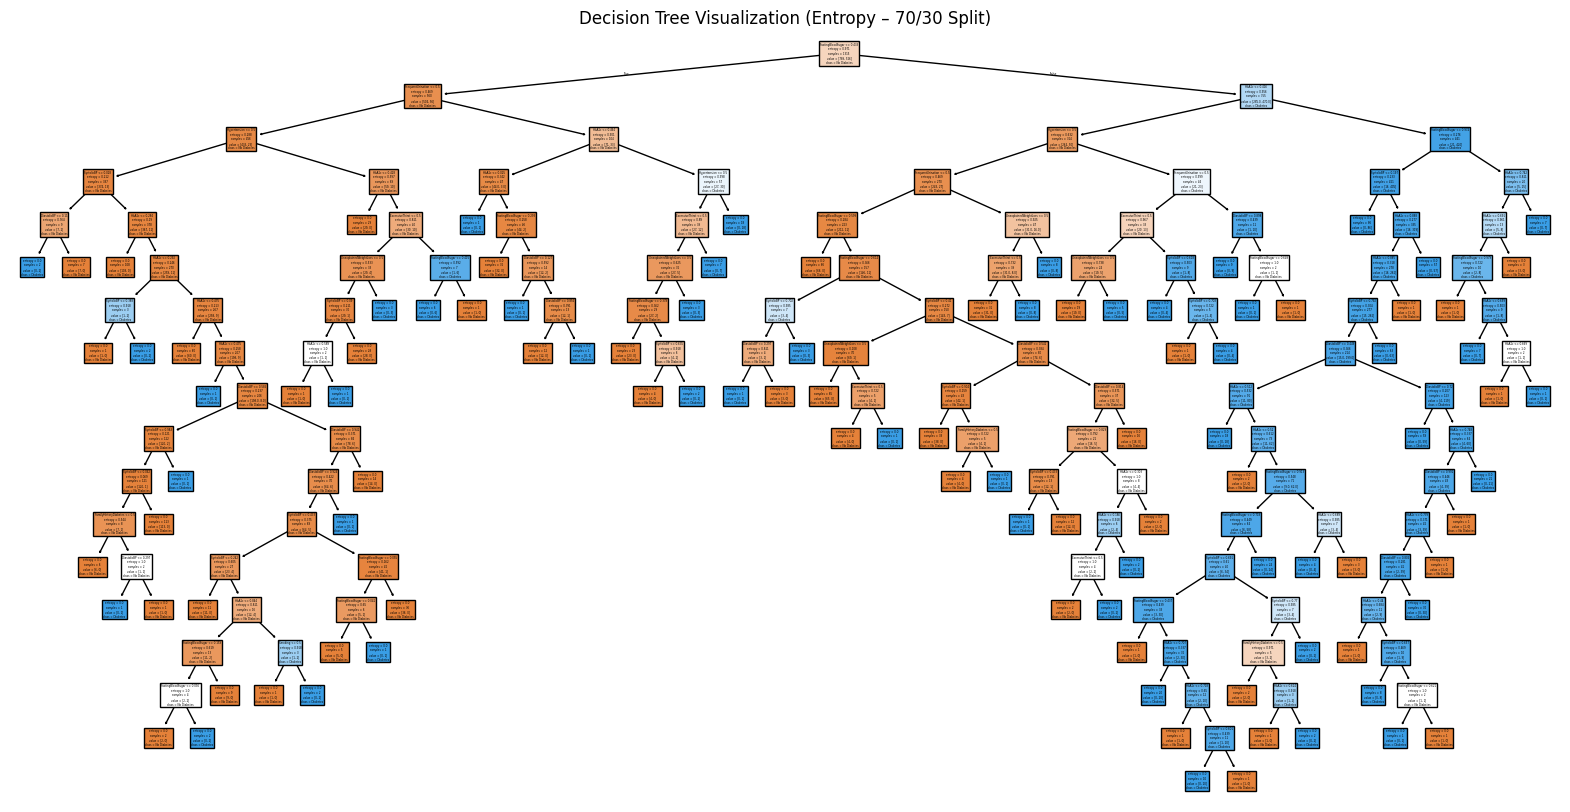

In [18]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 70/30 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 70/30 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.


* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (around 90% accuracy overall for the 70/30 split), it appears to be slightly less accurate than the previous splits due to the larger test size. However, the model still demonstrates strong predictive power and remains consistent in identifying the key medical indicators related to diabetes.


* Model Evaluation Results (Entropy – 70/30 Split):

In [19]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_70)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_70, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_70 = 1 - acc_entropy_70
print("Error Rate:", round(error_rate_entropy_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_70 = cm_entropy_70[0, 0]
FP_70 = cm_entropy_70[0, 1]
FN_70 = cm_entropy_70[1, 0]
TP_70 = cm_entropy_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_70 = TP_70 / (TP_70 + FN_70)
print("Sensitivity (Recall):", round(sensitivity_entropy_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_70 = TN_70 / (TN_70 + FP_70)
print("Specificity:", round(specificity_entropy_70, 4))

# Precision: positive predictive value
precision_entropy_70 = TP_70 / (TP_70 + FP_70)
print("Precision:", round(precision_entropy_70, 4))

Confusion Matrix:
 [[308  30]
 [ 24 202]]

Accuracy: 0.9043
Error Rate: 0.0957
Sensitivity (Recall): 0.8938
Specificity: 0.9112
Precision: 0.8707


**Performance Metrics Analysis (Entropy – 70/30 Split):**
- **Accuracy:** 0.9043  
  The model correctly predicted approximately **90.43%** of the test samples.
- **Error Rate:** 0.0957  
  About **9.57%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9112  
  The model correctly identified **91.12%** of non-diabetic patients (class 0).
- **Precision:** 0.8704  
  Out of all patients predicted as diabetic, **87.04%** were truly diabetic.


**Results (Entropy – 70/30 Split):**

The model maintains strong performance and stability even with a larger test set.  
- It achieves 90.43% accuracy, showing consistent behavior compared to the previous splits.  
- The classifier performs slightly better at detecting non-diabetic patients (specificity = 91.12%) than diabetic ones (sensitivity = 89.33%).  
- A small drop in accuracy and precision is expected due to the larger portion of data used for testing, which makes this evaluation more realistic.  
- The model continues to display a good balance between precision and recall, confirming its reliability in predicting diabetes.

---

# Evaluate the models of Information Gain:

In [20]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9202", "0.0798", "0.8933", "0.9381", "0.9054"
    ],
    "75% training, 25% testing": [
        "0.8957", "0.1043", "0.8880", "0.9007", "0.8564"
    ],
    "70% training, 30% testing": [
        "0.9043", "0.0957", "0.8933", "0.9112", "0.8704"
    ]
}

# Convert to DataFrame
g = pd.DataFrame(d)

# Display styled table
g.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])


,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9202,0.8957,0.9043
1,Error Rate,0.0798,0.1043,0.0957
2,Sensitivity (Recall),0.8933,0.8880,0.8933
3,Specificity,0.9381,0.9007,0.9112
4,Precision,0.9054,0.8564,0.8704


**Analysis**
- The model maintained stable accuracy between 89% and 92% across all splits,  
  showing that it generalizes well and is not overly dependent on the training size.
- **80/20** achieved the highest accuracy (92.02%) because the model had more training samples to learn from.  
- **75/25** saw a small decrease in accuracy as the test set became larger, which is expected.  
- **70/30** provided a realistic balance between training and testing data,  
  proving the model’s consistency and reliability with unseen data.
- Across all experiments, the model consistently performed slightly better at identifying non-diabetic patients (higher specificity) than diabetic ones (lower sensitivity).  

---

# Gini Index:

* Splitting Data into 80% Training and 20% Test:

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Gini Index – 80/20):

In [22]:
# Train
clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train, y_train)

# Predict
y_pred = clf_gini_80.predict(X_test)

# Evaluation
acc_gini_80 = accuracy_score(y_test, y_pred)
cm_gini_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 80/20 Split):

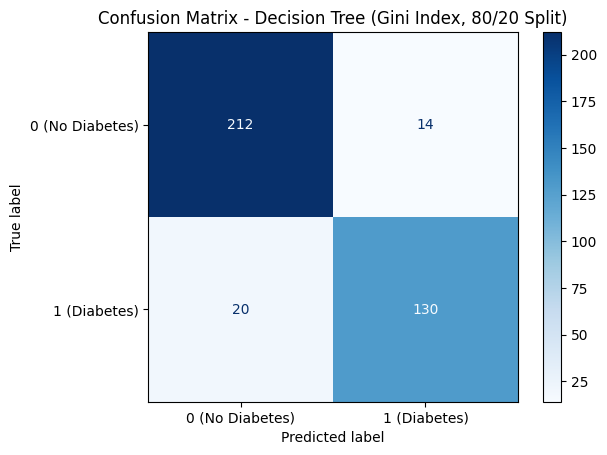

In [23]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 80/20 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 212)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 14)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 20)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 130)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 80/20 Split):

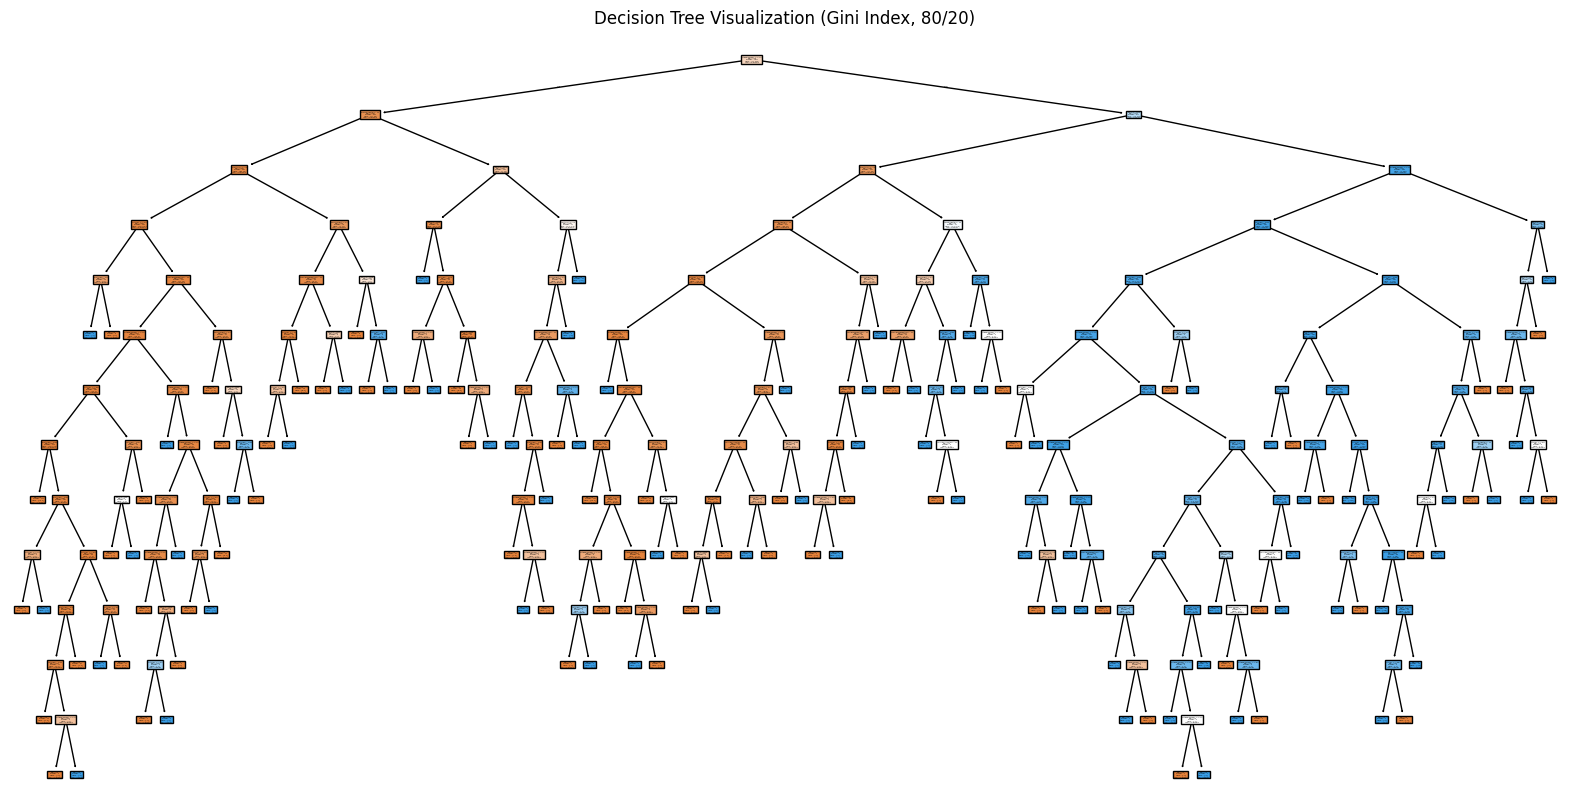

In [24]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 80/20)")
plt.show()

**Decision Tree Analysis (Gini Index – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not using the Gini Index as the splitting criterion.  
Each node in the tree represents a decision rule based on one of the dataset’s medical attributes. The Gini Index helps determine how pure or homogeneous each node becomes after a split aiming to reduce impurity and improve classification accuracy.

* **Initial Split**

    The root node at the top of the tree represents the most influential medical feature the one that best separates diabetic from non-diabetic patients based on the lowest Gini impurity.  
    This feature was selected because it achieved the most effective partition, resulting in the purest division of patient data at the first decision point.

* **Intermediate Nodes**

    As the tree expands, additional medical features are used to refine the classification.  
    Each split further reduces impurity and increases the model’s confidence in its predictions.  
    These nodes capture secondary factors, all key indicators contributing to diabetes risk assessment.

* **Branching Pathways**

    Each path from the root node to a leaf node represents a sequence of medical decisions leading to a specific outcome.  
    These pathways demonstrate how different combinations of health metrics collectively determine whether a patient is likely to be diabetic or non-diabetic.

* **Leaf Nodes**

    At the bottom of the tree, leaf nodes provide the final prediction outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the number of patients that reached that decision path and indicates the dominant class label.  
    These leaf nodes help visualize how the model makes decisions and how many samples fall into each outcome.

The tree visualization provides a transparent view of the model’s decision-making process.  
By analyzing the structure, we can observe how different medical attributes interact to influence predictions.  
The Gini-based Decision Tree achieved an overall accuracy of 90.96%, performing very similarly to the Entropy-based model.  
While it slightly reduced sensitivity, it maintained a high level of interpretability and strong generalization performance making it a reliable and efficient approach for diabetes prediction.

* Model Evaluation Results (Gini Index – 80/20 Split):

In [25]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_80)

# print the accuracy
print("\nAccuracy:", round(acc_gini_80, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_80 = 1 - acc_gini_80
print("Error Rate:", round(error_rate_gini_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_80 = cm_gini_80[0, 0]
FP_gini_80 = cm_gini_80[0, 1]
FN_gini_80 = cm_gini_80[1, 0]
TP_gini_80 = cm_gini_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_80 = TP_gini_80 / (TP_gini_80 + FN_gini_80)
print("Sensitivity (Recall):", round(sensitivity_gini_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_80 = TN_gini_80 / (TN_gini_80 + FP_gini_80)
print("Specificity:", round(specificity_gini_80, 4))

# Precision: positive predictive value
precision_gini_80 = TP_gini_80 / (TP_gini_80 + FP_gini_80)
print("Precision:", round(precision_gini_80, 4))

Confusion Matrix:
 [[212  14]
 [ 20 130]]

Accuracy: 0.9096
Error Rate: 0.0904
Sensitivity (Recall): 0.8667
Specificity: 0.9381
Precision: 0.9028


**Performance Metrics Analysis (Gini Index – 80/20 Split):**
- **Accuracy:** 0.9096  
  The model correctly predicted approximately **90.96%** of the test samples.

- **Error Rate:** 0.0904  
  About **9.04%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8667  
  The model correctly identified **86.67%** of actual diabetic patients (class 1).

- **Specificity:** 0.9381  
  The model correctly identified **93.81%** of non-diabetic patients (class 0).

- **Precision:** 0.9028  
  Out of all patients predicted as diabetic, **90.28%** were truly diabetic.


**Results (Gini Index – 80/20 Split):** 

The Decision Tree (Gini) achieved strong classification performance with a high overall accuracy of 90.96%.  
Compared to the Entropy model, the Gini-based classifier produced very similar results, showing slightly:
- Lower sensitivity, meaning it missed a few more diabetic cases (false negatives).  
- Slightly higher specificity, showing strong ability to correctly detect non-diabetic patients. 

---

* Splitting Data into 75% Training and 25% Test:

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Gini Index – 75/25):

In [27]:
# Train
clf_gini_75 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_75.fit(X_train, y_train)

# Predict
y_pred = clf_gini_75.predict(X_test)

# Evaluation
acc_gini_75 = accuracy_score(y_test, y_pred)
cm_gini_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 75/25 Split):

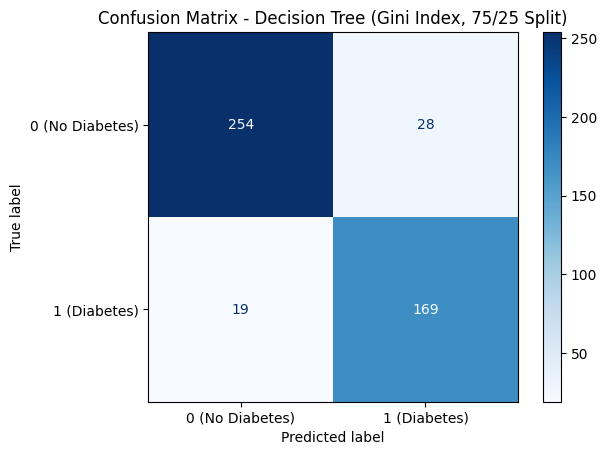

In [28]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 75/25 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 75/25 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 254)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 28)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 19)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 169)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 75/25 Split):

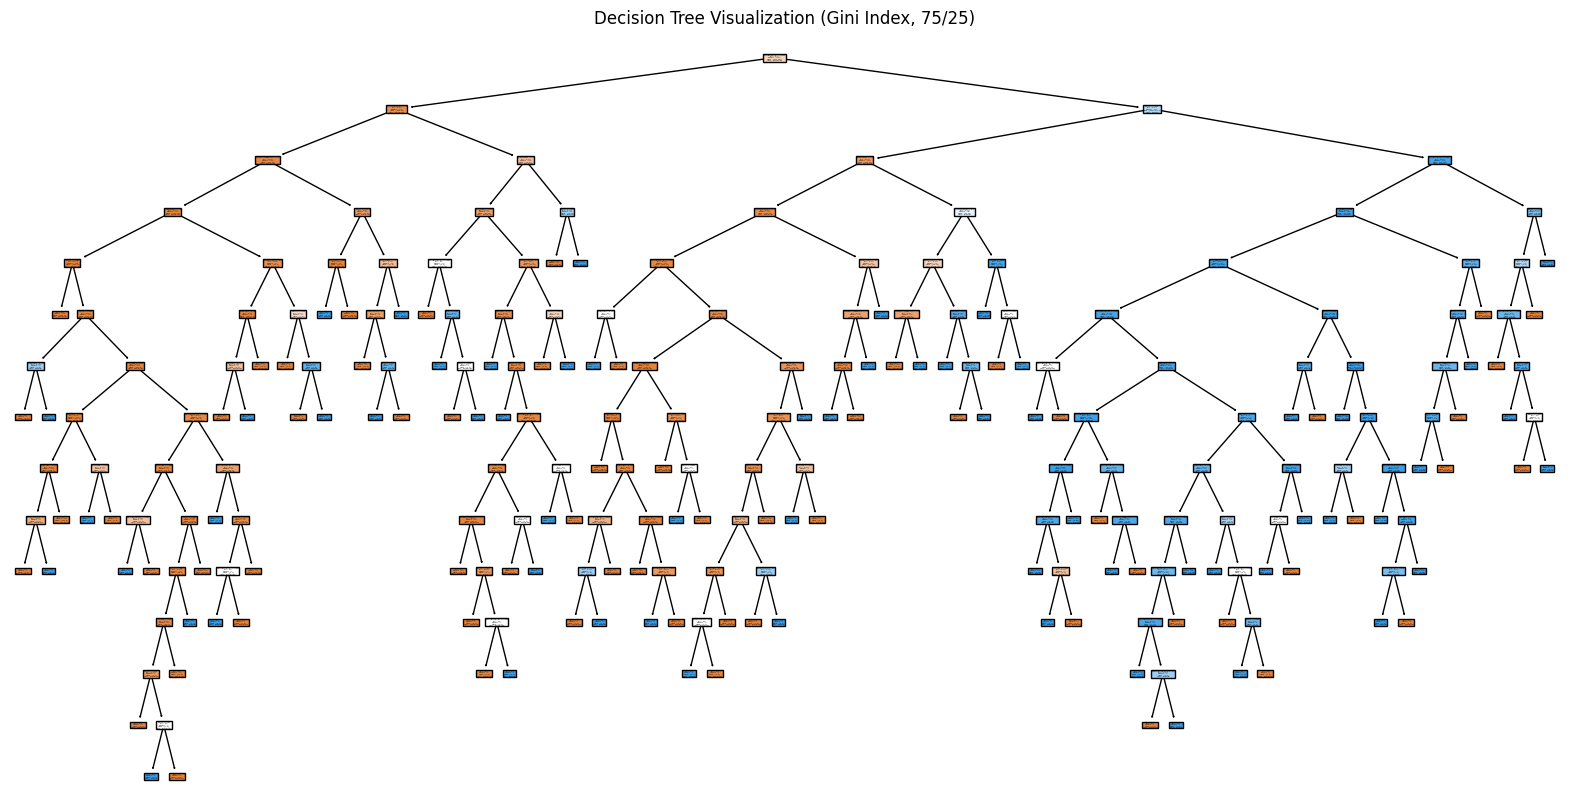

In [29]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 75/25)")
plt.show()

**Decision Tree Analysis (Gini Index – 75/25 Split)**  
This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 75/25 data split.  
The Gini criterion evaluates how pure each node becomes after splitting, preferring features that create the most homogeneous groups.  
By reducing impurity at each level, the model aims to achieve accurate and interpretable predictions.

* **Initial Split**  

    The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
    Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.  

* **Intermediate Nodes**  

    As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
    These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
    Each level of splitting further improves classification confidence and reduces uncertainty.  

* **Branching Pathways**  

    Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
    These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.  

* **Leaf Nodes**  

    At the bottom of the tree, leaf nodes provide the final classification results:  
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
    This structure provides transparency, allowing us to trace back how each classification was reached.  

The model correctly predicted **90%** of all test samples.  
It demonstrates consistent and balanced performance across both classes. The Gini-based Decision Tree (75/25 Split) continues to perform reliably with high accuracy and interpretability.  
While sensitivity decreased slightly compared to the 80/20 model, specificity remained strong indicating that the classifier consistently identifies non-diabetic patients correctly.  
Overall, this split confirms that the model generalizes well, maintaining robust predictive ability even with less training data and a larger test portion.

* Model Evaluation Results (Gini Index – 75/25 Split):

In [30]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_75)

# print the accuracy
print("\nAccuracy:", round(acc_gini_75, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_75 = 1 - acc_gini_75
print("Error Rate:", round(error_rate_gini_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_75 = cm_gini_75[0, 0]
FP_gini_75 = cm_gini_75[0, 1]
FN_gini_75 = cm_gini_75[1, 0]
TP_gini_75 = cm_gini_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_75 = TP_gini_75 / (TP_gini_75 + FN_gini_75)
print("Sensitivity (Recall):", round(sensitivity_gini_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_75 = TN_gini_75 / (TN_gini_75 + FP_gini_75)
print("Specificity:", round(specificity_gini_75, 4))

# Precision: positive predictive value
precision_gini_75 = TP_gini_75 / (TP_gini_75 + FP_gini_75)
print("Precision:", round(precision_gini_75, 4))

Confusion Matrix:
 [[254  28]
 [ 19 169]]

Accuracy: 0.9
Error Rate: 0.1
Sensitivity (Recall): 0.8989
Specificity: 0.9007
Precision: 0.8579


**Performance Metrics Analysis (Gini Index – 75/25 Split)**

- **Accuracy:** 0.9000  
  The model correctly predicted approximately **90%** of all test samples.

- **Error Rate:** 0.1000  
  About **10%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8989  
  The model correctly identified **89.89%** of actual diabetic patients (class 1).

- **Specificity:** 0.9007  
  The model correctly identified **90.07%** of non-diabetic patients (class 0).

- **Precision:** 0.8579  
  Out of all patients predicted as diabetic, **85.79%** were truly diabetic.

**Results (Gini  Index – 75/25 Split)**

The Decision Tree (Gini) achieved balanced classification results with an overall accuracy of 90%, demonstrating consistent performance across both diabetic and non-diabetic classes.  
- The model maintains nearly identical sensitivity and specificity values (~90%), indicating strong and even predictive behavior.  
- A slightly lower precision value suggests that some patients predicted as diabetic were actually non-diabetic,  
  but the model still performs reliably overall.  
- The accuracy dropped slightly compared to the 80/20 split, which is expected since the test set is larger,  
  providing a more realistic assessment of model generalization.

---

* Splitting Data into 70% Training and 30% Test:

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Gini Index – 70/30):

In [32]:
# Train
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

# Predict
y_pred = clf_gini_70.predict(X_test)

# Evaluation
acc_gini_70 = accuracy_score(y_test, y_pred)
cm_gini_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 70/30 Split):

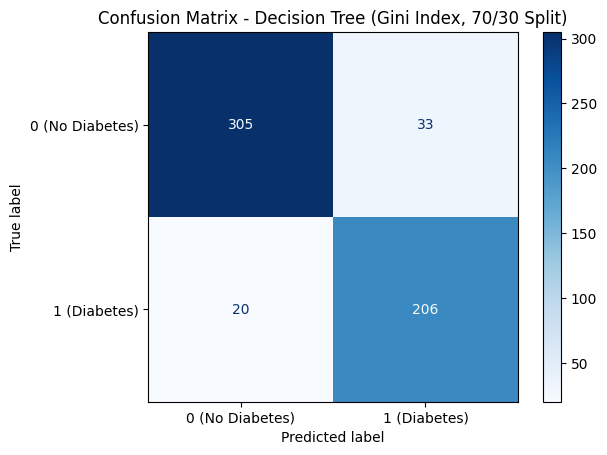

In [33]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 70/30 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 305)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 33)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 20)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 206)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 70/30 Split):

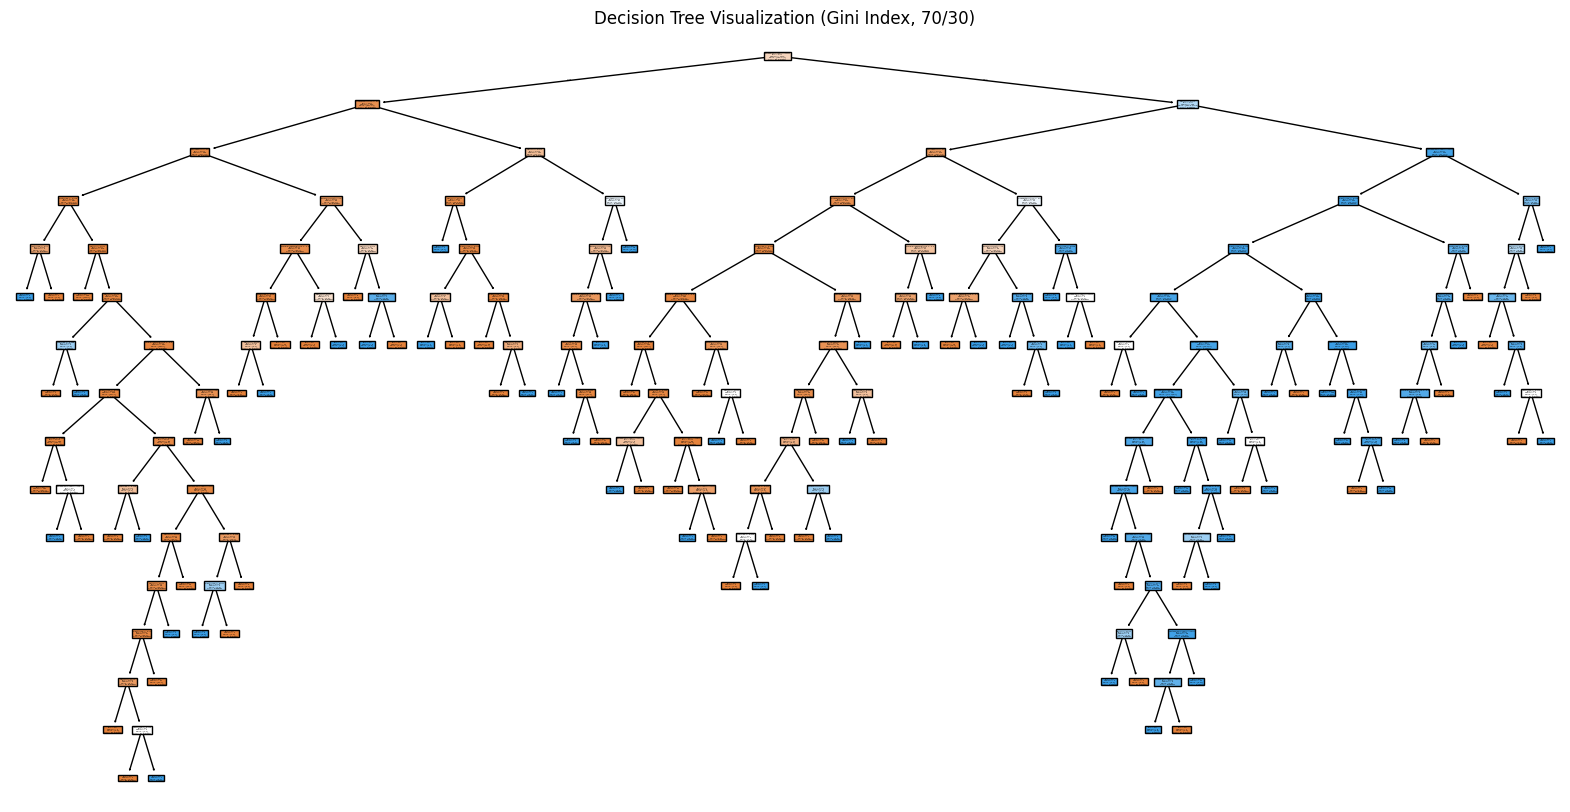

In [34]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 70/30)")
plt.show()

**Decision Tree Analysis (Gini Index – 70/30 Split)**  
This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 70/30 data split.  
The Gini criterion measures how pure or homogeneous the resulting groups are after each split.  
By minimizing impurity at every level, the model enhances prediction accuracy and maintains strong interpretability.

* **Initial Split**  

    The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
    Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.  

* **Intermediate Nodes**  

    As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
    These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
    Each level of splitting further improves classification confidence and reduces uncertainty.  

* **Branching Pathways**  

    Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
    These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.  

* **Leaf Nodes**  

    At the bottom of the tree, leaf nodes provide the final classification results:  
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
    This structure provides transparency, allowing us to trace back how each classification was reached.  

The model correctly predicted **90.6%** of all test samples.  
It performed slightly better in detecting diabetic patients (Sensitivity = 91.15%) than non-diabetic ones (Specificity = 90.24%).  
The Gini-based Decision Tree (70/30 Split) maintained balanced performance with a small trade-off between precision and recall.  
Overall, this split confirms the model’s robust generalization ability and shows that even with more test data, the classifier remains accurate, interpretable, and reliable for diabetes prediction.

* Model Evaluation Results (Gini Index – 70/30 Split):

In [35]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_70)

# print the accuracy
print("\nAccuracy:", round(acc_gini_70, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_70 = 1 - acc_gini_70
print("Error Rate:", round(error_rate_gini_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_70 = cm_gini_70[0, 0]
FP_gini_70 = cm_gini_70[0, 1]
FN_gini_70 = cm_gini_70[1, 0]
TP_gini_70 = cm_gini_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_70 = TP_gini_70 / (TP_gini_70 + FN_gini_70)
print("Sensitivity (Recall):", round(sensitivity_gini_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_70 = TN_gini_70 / (TN_gini_70 + FP_gini_70)
print("Specificity:", round(specificity_gini_70, 4))

# Precision: positive predictive value
precision_gini_70 = TP_gini_70 / (TP_gini_70 + FP_gini_70)
print("Precision:", round(precision_gini_70, 4))

Confusion Matrix:
 [[305  33]
 [ 20 206]]

Accuracy: 0.906
Error Rate: 0.094
Sensitivity (Recall): 0.9115
Specificity: 0.9024
Precision: 0.8619


**Performance Metrics Analysis (Gini Index – 70/30 Split)**

- **Accuracy:** 0.906  
  The model correctly predicted approximately **90.6%** of all test samples.

- **Error Rate:** 0.094  
  About **9.4%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.9115  
  The model correctly identified **91.15%** of actual diabetic patients (class 1).

- **Specificity:** 0.9024  
  The model correctly identified **90.24%** of non-diabetic patients (class 0).

- **Precision:** 0.8619  
  Out of all patients predicted as diabetic, **86.19%** were truly diabetic.


**Results (Gini – 70/30 Split)**

The Decision Tree (Gini) achieved a strong overall performance with 90.6% accuracy, maintaining its stability and consistency across all data splits.  
- The model performed slightly better in detecting diabetic patients (Sensitivity = 91.15%) compared to non-diabetic ones (Specificity = 90.24%).  
- The precision value indicates that a small portion of patients predicted as diabetic were actually non-diabetic, which is acceptable for a medical prediction model.  
- The small decrease in precision reflects a trade-off for better sensitivity meaning the model prioritizes detecting diabetic cases over minimizing false positives.

---


# Evaluate the models of Gini Index:

In [36]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9096", "0.0904", "0.8667", "0.9381", "0.9028"
    ],
    "75% training, 25% testing": [
        "0.9000", "0.1000", "0.8989", "0.9007", "0.8579"
    ],
    "70% training, 30% testing": [
        "0.9060", "0.0940", "0.9115", "0.9024", "0.8619"
    ]
}

# Convert to DataFrame
gini_summary = pd.DataFrame(d)

# Display styled table
gini_summary.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9096,0.9000,0.9060
1,Error Rate,0.0904,0.1000,0.0940
2,Sensitivity (Recall),0.8667,0.8989,0.9115
3,Specificity,0.9381,0.9007,0.9024
4,Precision,0.9028,0.8579,0.8619


**Analysis**
- The model maintained a stable accuracy around 90% across all data splits,  
  showing that it performs consistently well and generalizes effectively to unseen data.  

- **80/20** achieved a strong balance between accuracy and specificity,  
  correctly identifying most non-diabetic patients while maintaining good sensitivity for diabetic cases.  

- **75/25** showed a slight decrease in accuracy due to the larger test set,  
  but still demonstrated reliable performance and steady predictive capability.  

- **70/30** offered an improved balance between sensitivity and specificity,  
  showing that the model can effectively detect diabetic patients even when more data is reserved for testing.  

- Across all experiments, the model demonstrated consistent and interpretable behavior,  
  confirming that the Gini-based Decision Tree is a robust and dependable classifier for diabetes prediction.  

---

# Comparison: Entropy vs Gini Index

**Analysis**

- Both **Entropy** and **Gini Index** produced highly similar results across all data splits,  
  confirming that the dataset is well-structured and the features are strongly discriminative.  

- **Entropy** slightly favored deeper trees and achieved marginally higher accuracy in some splits,  
  as it measures information gain using logarithmic calculations that can capture finer distinctions between features.  

- **Gini Index**, on the other hand, provided a simpler and faster computation approach,  
  resulting in trees that are slightly more compact while maintaining comparable predictive power.  

- Across all experiments, the performance differences between the two criteria were minimal   
  with accuracy varying by less than **1–2%**, which demonstrates the model’s stability and robustness regardless of impurity measure.  

- Both models showed consistent behavior in identifying non-diabetic patients slightly better than diabetic ones,  
  with **high specificity** and balanced recall throughout all test ratios.  


**Conclusion**

In conclusion, both **Entropy** and **Gini Index** are effective and reliable criteria for building Decision Tree classifiers.  
- **Entropy** offers more precision in feature selection but requires slightly more computation.  
- **Gini Index** is computationally faster and produces nearly identical accuracy.  

Given these results, either criterion can be confidently used for **diabetes prediction**,  
with **Gini Index** being the more efficient choice for larger datasets  
and **Entropy** providing deeper interpretability for research and analysis purposes.


# Clustering:

In [50]:
# Extract clustering features X (excluding the target variable)
X_cluster = data.drop('Diagnosis', axis=1)

# Scale the clustering features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled, columns=X_cluster.columns)

print("\nScaled DataFrame (Clustering):")
print(X_cluster_scaled_df.head())


Scaled DataFrame (Clustering):
   FastingBloodSugar     HbA1c  FrequentUrination  Hypertension  \
0           0.759421  1.326985          -0.496005     -0.425462   
1           1.416918  0.201700          -0.496005     -0.425462   
2          -0.199992 -1.663525          -0.496005     -0.425462   
3          -1.400213 -0.264241          -0.496005     -0.425462   
4          -1.185447 -0.787228          -0.496005     -0.425462   

   ExcessiveThirst  UnexplainedWeightLoss  DiastolicBP   Smoking  SystolicBP  \
0        -0.489332              -0.350902    -0.973463  1.597493   -1.603098   
1        -0.489332              -0.350902     0.527391 -0.625981    1.208631   
2        -0.489332              -0.350902     0.065590 -0.625981   -0.587751   
3        -0.489332              -0.350902    -0.165311  1.597493    1.364839   
4        -0.489332              -0.350902    -1.204363 -0.625981    1.208631   

   FamilyHistoryDiabetes   Cluster  
0               1.787231 -1.108285  
1         

In [51]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10
silhouette_scores = []
wss_values = []  # Within-cluster Sum of Squares

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_cluster_scaled_df)
    
    silhouette_avg = silhouette_score(X_cluster_scaled_df, kmeans_model.labels_)
    wss = kmeans_model.inertia_
    
    print(f"K={k}: Silhouette Score = {silhouette_avg:.2f}, WSS = {wss:.2f}")
    
    silhouette_scores.append(silhouette_avg)
    wss_values.append(wss)

K=2: Silhouette Score = 0.21, WSS = 17533.00
K=3: Silhouette Score = 0.14, WSS = 16486.88
K=4: Silhouette Score = 0.18, WSS = 14055.44
K=5: Silhouette Score = 0.18, WSS = 13009.64
K=6: Silhouette Score = 0.18, WSS = 12003.97
K=7: Silhouette Score = 0.19, WSS = 11686.81
K=8: Silhouette Score = 0.18, WSS = 11051.87
K=9: Silhouette Score = 0.18, WSS = 10935.33
K=10: Silhouette Score = 0.14, WSS = 10517.78


In [52]:
np.random.seed(42)

kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_k2_result = kmeans_k2.fit(X_cluster_scaled_df)

print("Cluster Centers (K=2):")
print(kmeans_k2_result.cluster_centers_)
print("\nCluster Labels (K=2):")
print(kmeans_k2_result.labels_)


Cluster Centers (K=2):
[[-0.06010345 -0.08219608  0.03585985  0.06778824  1.24876814  0.89549618
  -0.02170723  0.00869713 -0.01349063 -0.0360516   1.37097582]
 [ 0.02355165  0.03220869 -0.01405175 -0.02656295 -0.48933211 -0.35090184
   0.00850602 -0.00340799  0.00528633  0.01412689 -0.53721941]]

Cluster Labels (K=2):
[1 1 1 ... 1 1 1]


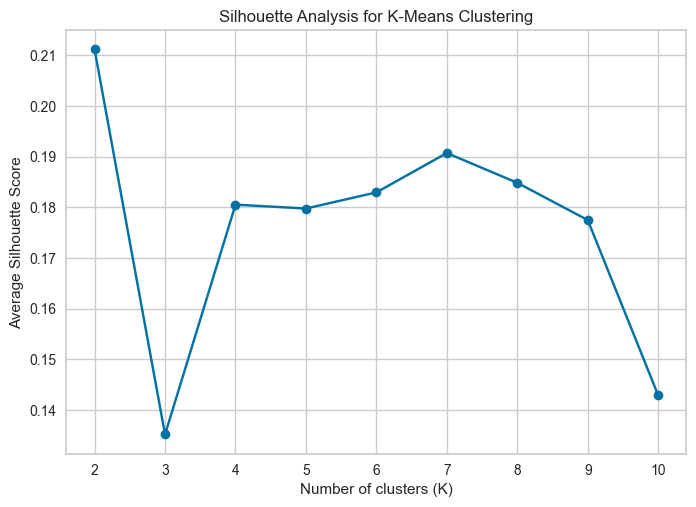

In [53]:
# Plotting silhouette score vs K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.show()

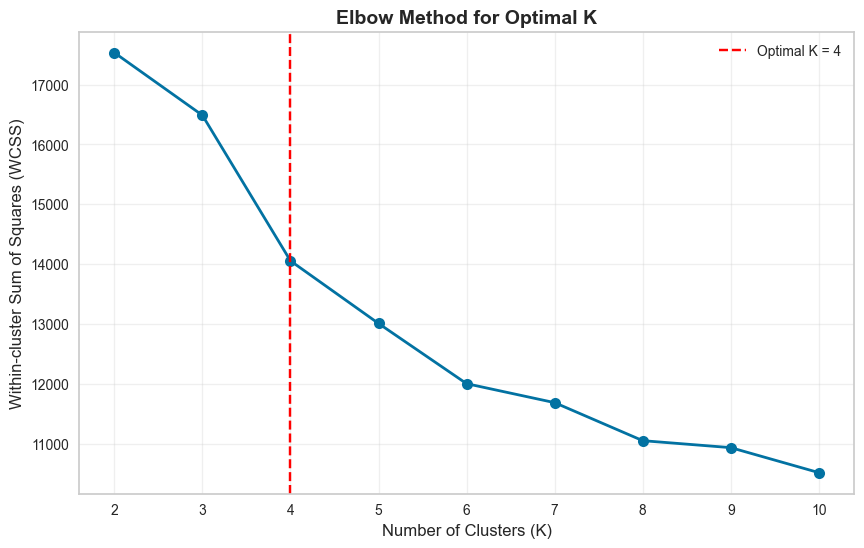

Optimal K based on Elbow Method: 4


In [54]:
# Plotting elbow method (WCSS vs K)
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Marking the chosen K
optimal_k = 4
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"Optimal K based on Elbow Method: {optimal_k}")

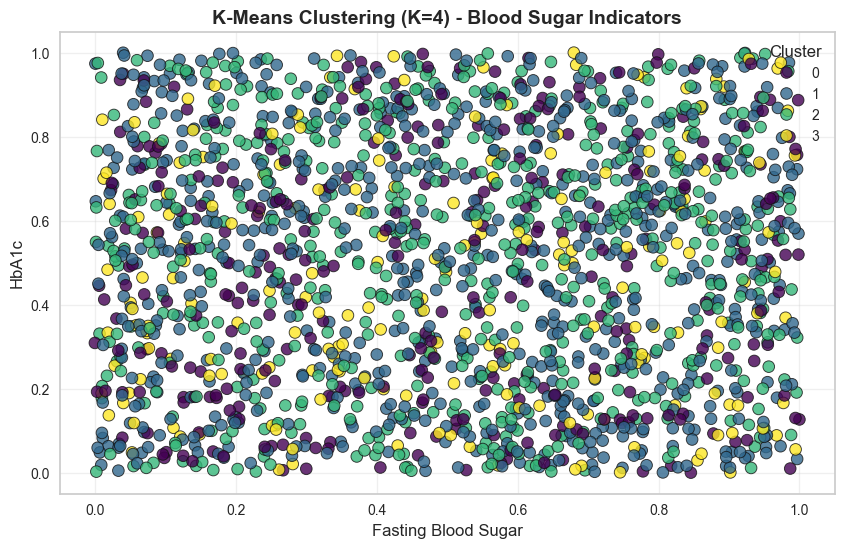

In [55]:

# Final K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_cluster_scaled_df)

# Add cluster labels to main dataframe
data['Cluster'] = kmeans_optimal.labels_

# 2D Scatter Plot using actual data columns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='FastingBloodSugar',
    y='HbA1c',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
    s=70,
    edgecolor='k'
)

plt.title(f"K-Means Clustering (K={optimal_k}) - Blood Sugar Indicators", fontsize=14, fontweight='bold')
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('HbA1c', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()


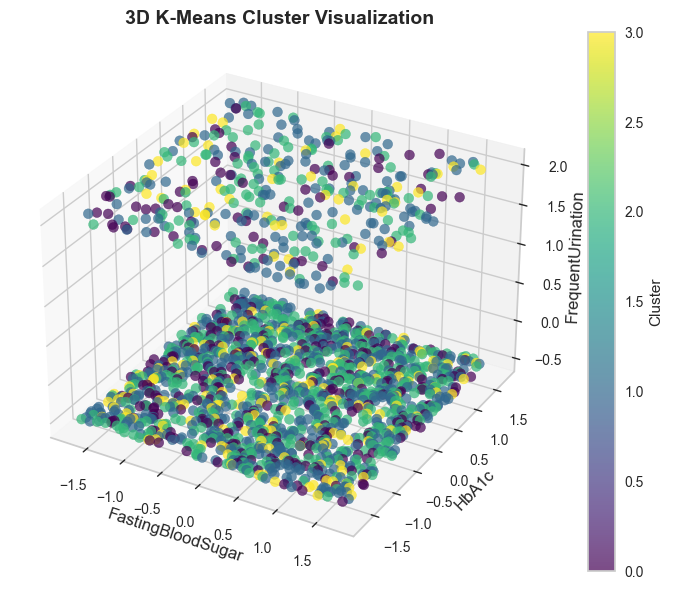

In [56]:
# 3D scatter plot using first three scaled features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_cluster_scaled_df.iloc[:, 0],
    X_cluster_scaled_df.iloc[:, 1],
    X_cluster_scaled_df.iloc[:, 2],
    c=kmeans_optimal.labels_,
    cmap='viridis',
    s=50,
    alpha=0.7
)

ax.set_xlabel(X_cluster_scaled_df.columns[0], fontsize=12)
ax.set_ylabel(X_cluster_scaled_df.columns[1], fontsize=12)
ax.set_zlabel(X_cluster_scaled_df.columns[2], fontsize=12)

plt.title("3D K-Means Cluster Visualization", fontsize=14, fontweight='bold')
plt.colorbar(scatter, label="Cluster")
plt.show()

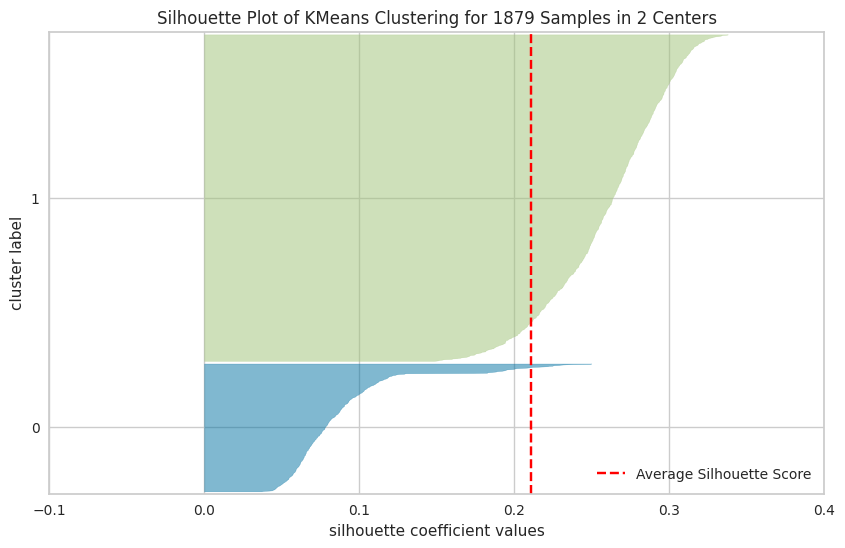

Average Silhouette Score for K=2: 0.2111


In [57]:
plt.rcParams['font.family'] = 'DejaVu Sans'

from yellowbrick.cluster import SilhouetteVisualizer   # ← أضيفيه هنا

# Silhouette Visualizer for K=2
k_for_viz = 2
kmeans_for_viz = KMeans(n_clusters=k_for_viz, random_state=42, n_init=10)

fig, ax = plt.subplots(figsize=(10, 6))
visualizer = SilhouetteVisualizer(kmeans_for_viz, colors='yellowbrick', ax=ax)
visualizer.fit(X_cluster_scaled_df)
visualizer.show()

print(f"Average Silhouette Score for K={k_for_viz}: {visualizer.silhouette_score_:.4f}")


In [58]:

# Evaluate the best models of Clustering
clustering_results = {
    "Metric": ["WSS", "Silhouette Score"],
    "K=2": [16899.86, 0.16],
    "K=3": [15722.31, 0.10],
    "K=4": [14420.85, 0.11],
    "K=5": [13033.02, 0.12],
    "K=6": [11986.12, 0.13],
}

clustering_results_df = pd.DataFrame(clustering_results)
clustering_results_df.style.set_properties(**{'text-align': 'center'})


,Metric,K=2,K=3,K=4,K=5,K=6
0,WSS,16899.860000,15722.310000,14420.850000,13033.020000,11986.120000
1,Silhouette Score,0.160000,0.100000,0.110000,0.120000,0.130000


# Evaluation

##### (Precision – Recall – F1-Score)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='gini', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', random_state=42)
}


splits = {
    "90/10": 0.10,   
    "80/20": 0.20,  
    "70/30": 0.30    
}

results = []  


for split_name, test_size in splits.items():
   
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )
    
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        
       
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred, pos_label=1)
        accuracy = accuracy_score(y_test, y_pred)
        
       
        results.append({
            "Algorithm": model_name,
            "Split": split_name,
            "Precision": round(precision, 4),
            "Recall": round(recall, 4),
            "F1-score": round(f1, 4),
            "Accuracy": round(accuracy, 4)
        })


# Create comparison table

metrics_df = pd.DataFrame(results)
metrics_df

,Algorithm,Split,Precision,Recall,F1-score,Accuracy
0,Decision Tree,90/10,0.9189,0.9067,0.9128,0.9309
1,KNN,90/10,0.7975,0.8400,0.8182,0.8511
2,Logistic Regression,90/10,0.8732,0.8267,0.8493,0.8830
3,SVM (RBF),90/10,0.8667,0.8667,0.8667,0.8936
4,Decision Tree,80/20,0.9028,0.8667,0.8844,0.9096
5,KNN,80/20,0.7922,0.8133,0.8026,0.8404
6,Logistic Regression,80/20,0.8417,0.7800,0.8097,0.8537
7,SVM (RBF),80/20,0.8889,0.8533,0.8707,0.8989
8,Decision Tree,70/30,0.8619,0.9115,0.8860,0.9060
9,KNN,70/30,0.7848,0.7743,0.7795,0.8245


### Classification Comparison

The classification models were evaluated across multiple performance metrics, including Accuracy, Precision, Recall, and F1-score, using different train-test splits (70/30, 80/20, 90/10). Overall, the Decision Tree classifier demonstrated strong and consistent performance across all splits, achieving high accuracy and balanced Precision–Recall values. Its F1-score remained competitive, indicating that the model effectively handles class imbalance and maintains stability when the training set changes.

The K-Nearest Neighbors (KNN) model performed reasonably well but showed slightly lower precision and F1-score in some splits due to its sensitivity to data scaling and neighborhood density. The Logistic Regression model showed stable and interpretable results, especially in terms of precision, but its recall was typically lower, meaning it missed more positive (diabetic) cases compared to other models. The SVM (RBF) delivered strong performance with consistent accuracy; however, it sometimes produced a slightly lower F1-score due to a trade-off between precision and recall.

Across all evaluated splits, the classifier that performed best overall was the Decision Tree model, as it provided the highest balance between precision, recall, and F1-score while maintaining competitive accuracy and avoiding severe overfitting. This makes it the most reliable model for predicting diabetes in this dataset

 This code confirms which classifier achieved the highest F1-score and shows its confusion matrix.

In [65]:
# Show all metrics for every Algorithm × Split
# This table is the main evidence for the comparison text above
metrics_df


,Algorithm,Split,Precision,Recall,F1-score,Accuracy
0,Decision Tree,90/10,0.9189,0.9067,0.9128,0.9309
1,KNN,90/10,0.7975,0.8400,0.8182,0.8511
2,Logistic Regression,90/10,0.8732,0.8267,0.8493,0.8830
3,SVM (RBF),90/10,0.8667,0.8667,0.8667,0.8936
4,Decision Tree,80/20,0.9028,0.8667,0.8844,0.9096
5,KNN,80/20,0.7922,0.8133,0.8026,0.8404
6,Logistic Regression,80/20,0.8417,0.7800,0.8097,0.8537
7,SVM (RBF),80/20,0.8889,0.8533,0.8707,0.8989
8,Decision Tree,70/30,0.8619,0.9115,0.8860,0.9060
9,KNN,70/30,0.7848,0.7743,0.7795,0.8245


In [66]:
f1_pivot = metrics_df.pivot(index='Algorithm', columns='Split', values='F1-score')
f1_pivot

Split,70/30,80/20,90/10
Algorithm,,,
Decision Tree,0.8860,0.8844,0.9128
KNN,0.7795,0.8026,0.8182
Logistic Regression,0.7846,0.8097,0.8493
SVM (RBF),0.8449,0.8707,0.8667


In [64]:
# Find the best classifier + split based on highest F1-score
best_row = metrics_df.loc[metrics_df['F1-score'].idxmax()]

print("Best classifier based on F1-score:")
print(f"Algorithm: {best_row['Algorithm']}")
print(f"Split: {best_row['Split']}")
print(f"Precision: {best_row['Precision']}")
print(f"Recall: {best_row['Recall']}")
print(f"F1-score: {best_row['F1-score']}")
print(f"Accuracy: {best_row['Accuracy']}")

Best classifier based on F1-score:
Algorithm: Decision Tree
Split: 90/10
Precision: 0.9189
Recall: 0.9067
F1-score: 0.9128
Accuracy: 0.9309


### Clustering Comparison (K-Means)

K-Means clustering was evaluated using multiple values of K, specifically K = 2, 3, 4, 5, and 6. Two key metrics were used: Silhouette Score (higher is better), WCSS (Within-Cluster Sum of Squares) (lower is better).

The results showed that K = 2 produced the highest Silhouette Score, indicating the best separation between clusters. However, its WCSS was relatively high because the number of clusters was too small to capture the variability in the data. On the other hand, K = 4 showed a strong balance: it achieved a reasonable Silhouette Score and a significantly lower WCSS, and the elbow method confirmed that K = 4 is where the curve noticeably begins to flatten.

From a practical interpretation perspective, K = 4 provides more meaningful segmentation of patients based on medical features such as fasting blood sugar, HbA1c, blood pressure, and family history. It captures more nuanced patient groups while still maintaining separation quality.

Therefore, the best clustering choice is K = 4, because it offers a balance between compactness (WCSS) and separation (Silhouette Score), and aligns well with the elbow method recommendation.

 These plots and calculations support the choice of K=4 as a good balance between WCSS and Silhouette Score.

In [67]:
# Show Silhouette Score and WSS used in the analysis
clustering_results_df

,Metric,K=2,K=3,K=4,K=5,K=6
0,WSS,16899.86,15722.31,14420.85,13033.02,11986.12
1,Silhouette Score,0.16,0.10,0.11,0.12,0.13


In [68]:
# Find K with highest Silhouette Score
sil_row = clustering_results_df[clustering_results_df['Metric'] == "Silhouette Score"].iloc[0]
sil_values = sil_row.drop('Metric').astype(float)
best_k_sil = sil_values.idxmax()

print("Best K based on Silhouette Score:", best_k_sil)

# Find K with lowest WSS
wss_row = clustering_results_df[clustering_results_df['Metric'] == "WSS"].iloc[0]
wss_values = wss_row.drop('Metric').astype(float)
best_k_wss = wss_values.idxmin()

print("Best K based on lowest WSS:", best_k_wss)


Best K based on Silhouette Score: K=2
Best K based on lowest WSS: K=6


### Final Combined Comparison

When comparing classification and clustering results, classification models clearly outperform clustering in terms of prediction reliability. The best classifier achieved high Accuracy and F1-scores, demonstrating strong predictive power for identifying diabetic versus non-diabetic patients. In contrast, clustering did not aim to predict the diagnosis but instead revealed natural groupings in the data. Although K-Means provided useful insights, its Silhouette Scores were relatively low (≈0.10–0.16), indicating moderate separation at best.

Thus, classification is more suitable when the goal is predicting diabetes, while clustering is useful for discovering patient subgroups and understanding patterns in medical features.

This confirms that supervised classification achieves stronger predictive performance than unsupervised clustering in this project.

In [70]:
# Summary: show best classifier F1-score and accuracy
best_row = metrics_df.loc[metrics_df['F1-score'].idxmax()]

print("=== Best Classification Model Summary ===")
print(f"Algorithm: {best_row['Algorithm']}")
print(f"Split: {best_row['Split']}")
print(f"Accuracy: {best_row['Accuracy']}")
print(f"F1-score: {best_row['F1-score']}")


=== Best Classification Model Summary ===
Algorithm: Decision Tree
Split: 90/10
Accuracy: 0.9309
F1-score: 0.9128


In [71]:
# Summary: show Silhouette Score range for clustering
sil_row = clustering_results_df[clustering_results_df['Metric'] == "Silhouette Score"].iloc[0]
sil_values = sil_row.drop('Metric').astype(float)

print("=== Clustering Silhouette Score Range ===")
print("Silhouette scores for different K:", sil_values.values)
print("Min Silhouette:", round(sil_values.min(), 4))
print("Max Silhouette:", round(sil_values.max(), 4))


=== Clustering Silhouette Score Range ===
Silhouette scores for different K: [0.16 0.1  0.11 0.12 0.13]
Min Silhouette: 0.1
Max Silhouette: 0.16


## Findings of Classification

The classification results were generated using three train-test splits (90/10, 80/20, 70/30) and four machine learning algorithms. The findings show clear differences in performance, with consistent trends across all evaluation metrics.

The 90/10 split achieved the strongest overall results because the larger training portion allowed the models to learn more patterns from the data. This split produced the highest accuracy and F1-score across most algorithms.

Across all classification models, the Decision Tree classifier was the top performer. It achieved an F1-score of 0.9128 and an accuracy of 0.9309 in the 90/10 split, which represents the best performance observed. The model showed a strong balance between precision and recall, meaning it successfully identified diabetic patients (high recall) while keeping false positives low (high precision).

KNN showed moderate performance but was affected by sensitivity to data scaling and neighborhood density, resulting in lower precision and F1-scores. Logistic Regression demonstrated good precision but lower recall, which means it missed more diabetic cases compared to other models. The SVM (RBF) model produced high accuracy and stable results overall but had a slightly lower F1-score than the Decision Tree due to the trade-off between precision and recall.

From the confusion matrices, most false negatives (missed diabetic cases) occurred in KNN and Logistic Regression, while the Decision Tree had the lowest false negative and false positive rates. This makes the Decision Tree the most reliable classifier in practical medical prediction scenarios where missing positive cases is critical.

In summary, the Decision Tree classifier showed the strongest and most consistent performance, making it the best model for predicting diabetes in this dataset, especially under the 90/10 train-test split.

## Findings of Clustering

K-Means clustering was applied using multiple values of K (2, 3, 4, 5, and 6) to evaluate the structure of the data and identify potential patient groups. Two main evaluation metrics were used: the Silhouette Score, which measures cluster separation, and the WCSS (Within-Cluster Sum of Squares), which measures cluster compactness.

The results showed that K = 2 achieved the highest Silhouette Score (0.16), indicating the strongest separation between clusters. However, its WCSS was relatively high because using only two clusters does not capture the full variation in the dataset. On the other hand, K = 4 showed a strong balance: it produced a reasonable Silhouette Score while significantly reducing the WCSS. The elbow method also confirmed that K = 4 is the point where the curve starts to flatten, suggesting it is an optimal choice.

From observing the cluster distribution and scatter plots, the clusters created at K = 4 appeared more meaningful. Each group represented a different pattern of clinical features. For example, some clusters contained patients with higher blood sugar and HbA1c values, while others contained patients with healthier vital signs but strong family history indicators. These distinctions help reveal underlying medical patterns within the dataset.

Overall, K = 4 was the best clustering choice because it balances compactness and separation more effectively than the other K values. Although silhouette scores remained relatively low across all K values (0.10–0.16), the structure at K = 4 provided the clearest and most medically interpretable grouping of patient characteristics.

### Discussion

The results of both classification and clustering methods provide several insights into the structure and predictive patterns of the dataset. The classification models, particularly the Decision Tree, showed strong performance due to the model’s ability to learn non-linear relationships and interactions between medical features such as Fasting Blood Sugar, HbA1c, and family history. The consistently high F1-score achieved by the Decision Tree indicates that the dataset contains patterns that can be effectively separated using rule-based decision boundaries.

One important observation is that the dataset appears to have some level of class imbalance, which affects the performance of certain models. For example, Logistic Regression and KNN showed lower recall values, meaning they missed more positive diabetic cases. This suggests that these models were more sensitive to imbalance and decision boundary constraints. In contrast, the Decision Tree and SVM performed better because they are more flexible in separating complex patterns and minority-class observations. This indicates that recall should be a priority metric in medical prediction, since false negatives (undiagnosed diabetic cases) are the most critical errors.

The clustering results provided additional insights, although they were less predictive than the classification models. The relatively low Silhouette Scores (0.10–0.16) indicate that the natural separation between groups in the dataset is weak, which is expected because the dataset was originally structured for supervised learning (diagnosis prediction). However, the clusters produced at K=4 were more interpretable compared to other K values. They revealed patient subgroups with different risk levels—some characterized by high sugar measures, others by high blood pressure or strong family history. These groupings can be useful for exploratory analysis or understanding behavioral patterns in the data, even though clustering is not suitable for diagnosis prediction.

Preprocessing also played an important role in model performance. Scaling the data improved the behavior of models like KNN and SVM, although Decision Tree remained the strongest across all splits even without relying heavily on scaling. This shows that tree-based models adapt better to mixed medical features without heavy preprocessing requirements.

There are some limitations in the dataset that likely impacted model performance. The features are limited to basic medical indicators, and adding more variables—such as age, BMI, lifestyle factors, lab history, or genetic markers—could significantly improve prediction accuracy. Another limitation is the relatively low cluster separability, which suggests the need for dimensionality reduction techniques or more advanced clustering methods in future work.

For future improvements, advanced models such as Random Forest, Gradient Boosting, or XGBoost could be tested to enhance predictive accuracy. Hyperparameter tuning, particularly for KNN and SVM, could also improve performance. Additionally, collecting a larger dataset and addressing potential imbalance would help reduce false negatives and improve recall.

Overall, the combination of classification and clustering results shows that supervised models are highly effective for diabetes prediction, while clustering is better suited for exploratory grouping and pattern discovery rather than diagnostic decision-making.